
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Machine Learning & Classification <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [ ]:
# please fill in your student number and name
student_number = '403206479'
Name = 'Emadeddin'
Last_Name = 'Rostamian'

## Logistic Regression (50 points)

In this notebook, we will explore the fundamentals of classification in machine learning by implementing Logistic Regression from scratch, step by step.

#### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### From scratch implementation (20 points)

- **Sigmoid Function**: Logistic Regression models the probability of a class label as:  
  
  $$
  P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = X \cdot w
  $$

  where $ w $ is the weight vector, $ X $ is the feature matrix, and $ \sigma(z) $ maps the input to a value between 0 and 1.

- **Binary Cross-Entropy Loss**: To train the model, we minimize the binary cross-entropy loss:  

  $$
  \mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
  $$  

  Here, $ y_i $ is the true label, and $ \hat{y}_i $ is the predicted probability.

- **Gradient Descent (GD)**: To optimize the weights, we use Gradient Descent, an iterative algorithm that updates the weights in the direction of the negative gradient of the loss:  

  $$
  w \gets w - \alpha \cdot \nabla \mathcal{L}
  $$  

  where $ \alpha $ is the learning rate and $ \nabla \mathcal{L} $ is the gradient.



The class `LogisticRegressionGD` implements logistic regression with the following features:
- Binary classification using the sigmoid function.
- Training using gradient descent with a configurable learning rate, number of steps, and convergence tolerance.
- Validation accuracy tracking and loss history for monitoring training progress.
- Prediction capability and a confusion matrix visualization.

Let’s now implement this step by step and evaluate its performance on a classification dataset.

In [ ]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
        """
        Initialize the parameters for the Logistic Regression model.
        """
        self.lr = learning_rate
        self.steps = n_steps
        self.tolerance = tolerance
        self.weights = None

    def sigmoid(self, z):
        """
        Apply the sigmoid function to scalar, vector, or matrix.
        """
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute the binary cross-entropy loss for the current weights.
        """
        yhat = self.sigmoid(X @ self.weights)
        yhat = yhat.reshape(-1, 1)
        return -np.mean(y * np.log(yhat + 1e-6) + (1 - y) * np.log(1 - yhat + 1e-6))

    def compute_gradient(self, X, y):
        """
        Compute the gradient of the loss function with respect to the weights.
        """
        yhat = self.sigmoid(X @ self.weights)
        yhat = yhat.reshape(-1, 1)
        return X.T @ (yhat - y) / y.shape[0]

    def test_accuracy(self, X_test, y_test):
        """
        Compute the accuracy of the model on test data.
        """
        yhat = self.predict(X_test)
        return 100 * np.mean(y_test == yhat)

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Train the Logistic Regression model using gradient descent.
        """
        y_train = y_train.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        self.weights = np.random.normal(0, 1, size=(X_train.shape[1], 1))

        history = {
            'train_loss': [],
            'val_loss': [],
            'train_accuracy': [],
            'val_accuracy': []
        }

        for i in range(self.steps):
            train_loss = self.compute_loss(X_train, y_train)
            val_loss = self.compute_loss(X_val, y_val)
            train_accuracy = self.test_accuracy(X_train, y_train)
            val_accuracy = self.test_accuracy(X_val, y_val)

            history['train_loss'].append(train_loss)
            history['val_loss'].append(val_loss)
            history['train_accuracy'].append(train_accuracy)
            history['val_accuracy'].append(val_accuracy)

            if i % 100 == 0:
                print(f"Epoch {i}/{self.steps}: Training Loss = {train_loss:.4f}, Training Accuracy = {train_accuracy:.2f}%, Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_accuracy:.2f}%")

            gradient = self.compute_gradient(X_train, y_train)
            new_weights = self.weights - self.lr * gradient

            if np.linalg.norm(new_weights - self.weights, ord=1) < self.tolerance:
                print(f"Converged after {i} steps.")
                break

            self.weights = new_weights

        return history

    def predict(self, X):
        """
        Predict binary labels for given data.
        """
        probabilities = self.sigmoid(X @ self.weights)
        return (probabilities >= 0.5).astype(int)

    def plot_confusion_matrix(self, X_val, y_val, labels):
        """
        Plot the confusion matrix for the validation data.
        """
        yhat = self.predict(X_val)
        cm = confusion_matrix(y_val, yhat)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

Now that you have implemented the Logistic Regression class, let's test it on a sample dummy dataset and visualize the decision boundary:

Epoch 0/1000: Training Loss = 0.7583, Training Accuracy = 63.57%, Validation Loss = 0.7053, Validation Accuracy = 66.67%
Epoch 100/1000: Training Loss = 0.3736, Training Accuracy = 83.57%, Validation Loss = 0.3857, Validation Accuracy = 86.67%
Epoch 200/1000: Training Loss = 0.3663, Training Accuracy = 83.57%, Validation Loss = 0.3767, Validation Accuracy = 86.67%
Epoch 300/1000: Training Loss = 0.3651, Training Accuracy = 83.57%, Validation Loss = 0.3750, Validation Accuracy = 85.00%
Epoch 400/1000: Training Loss = 0.3649, Training Accuracy = 83.57%, Validation Loss = 0.3745, Validation Accuracy = 85.00%
Epoch 500/1000: Training Loss = 0.3648, Training Accuracy = 83.57%, Validation Loss = 0.3743, Validation Accuracy = 85.00%
Epoch 600/1000: Training Loss = 0.3648, Training Accuracy = 83.57%, Validation Loss = 0.3743, Validation Accuracy = 85.00%
Epoch 700/1000: Training Loss = 0.3648, Training Accuracy = 83.57%, Validation Loss = 0.3742, Validation Accuracy = 85.00%
Epoch 800/1000: Tr

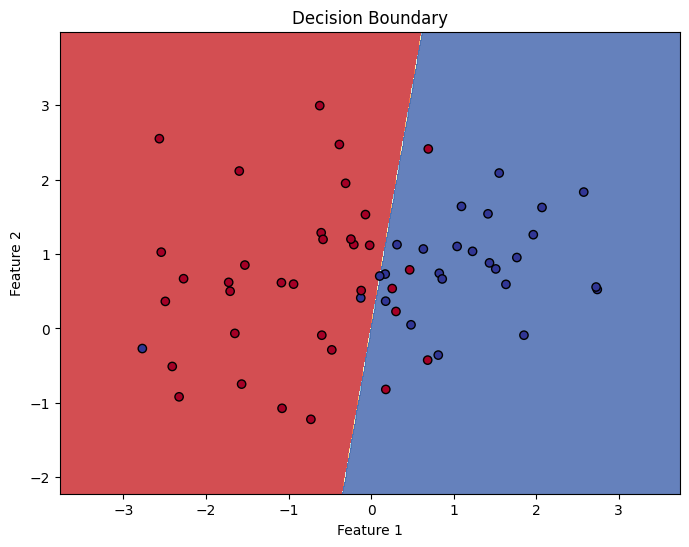

In [ ]:
#TODO: create a sample linearly separable binary dataset and visualize the decision boundary
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
y = y.flatten()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegressionGD()
history = model.fit(X_train, y_train, X_val, y_val)

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    if X.shape[1] != 2:
        raise ValueError("Can only plot decision boundary for 2D data.")

    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

if X.shape[1] == 2:
    plot_decision_boundary(model, X_val, y_val)

### Towards real numerical datasets (15 points)

With our tools ready, we'll now work with the Breast Cancer dataset from scikit-learn—a classic binary classification dataset commonly used in machine learning. This dataset includes various features describing tumors, along with their corresponding labels (benign or malignant).

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA


#TODO: load breast cancer dataset and inspect it's features and target
data = load_breast_cancer()
features = data.data
target = data.target
feature_names = data.feature_names
target_names = data.target_names
print(f'Features : {feature_names}\nTargets: {target_names}')

Features : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets: ['malignant' 'benign']


As you are familiar with, adding bias term 1 is necessary as well:

In [ ]:
#TODO: scale data, add bias term
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
X = np.hstack([scaled_features, np.ones((scaled_features.shape[0], 1))])
y = target
#TODO: split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

Since the dataset has a high number of features, we will use dimensionality reduction to make it easier to visualize. For this purpose, we will apply Principal Component Analysis (PCA):

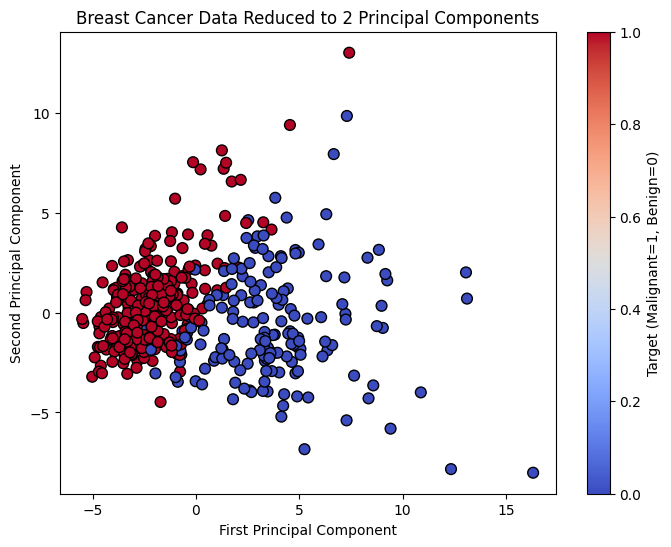

In [ ]:
#TODO: reduce data into first two PCs and visualize the data
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=60)
plt.colorbar(label='Target (Malignant=1, Benign=0)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Breast Cancer Data Reduced to 2 Principal Components')
plt.show()

Finally, we will train the Logistic Regression model on this dataset. We will visualize the loss reduction during training and evaluate the model's performance using a confusion matrix:

In [ ]:
#TODO: Train model and print out validation accuracy
model = LogisticRegressionGD()
history = model.fit(X_pca_train,y_train, X_pca_test,y_test)

Epoch 0/1000: Training Loss = 2.4542, Training Accuracy = 15.60%, Validation Loss = 2.5981, Validation Accuracy = 13.16%
Epoch 100/1000: Training Loss = 0.1532, Training Accuracy = 94.29%, Validation Loss = 0.1059, Validation Accuracy = 97.37%
Epoch 200/1000: Training Loss = 0.1429, Training Accuracy = 94.29%, Validation Loss = 0.0915, Validation Accuracy = 97.37%
Epoch 300/1000: Training Loss = 0.1397, Training Accuracy = 94.73%, Validation Loss = 0.0859, Validation Accuracy = 97.37%
Epoch 400/1000: Training Loss = 0.1384, Training Accuracy = 94.73%, Validation Loss = 0.0829, Validation Accuracy = 97.37%
Epoch 500/1000: Training Loss = 0.1377, Training Accuracy = 94.73%, Validation Loss = 0.0811, Validation Accuracy = 97.37%
Epoch 600/1000: Training Loss = 0.1374, Training Accuracy = 94.73%, Validation Loss = 0.0799, Validation Accuracy = 97.37%
Epoch 700/1000: Training Loss = 0.1372, Training Accuracy = 94.73%, Validation Loss = 0.0791, Validation Accuracy = 97.37%
Epoch 800/1000: Tr

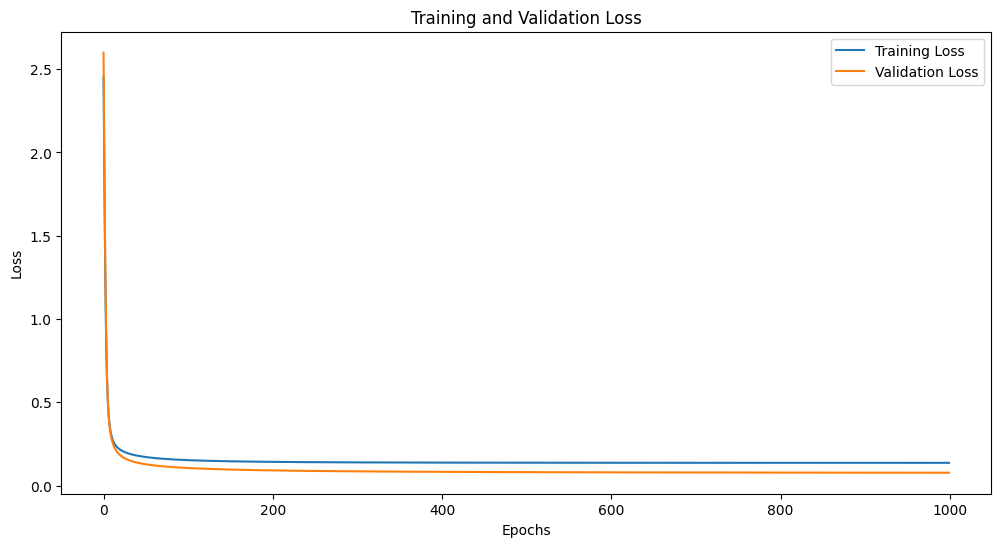

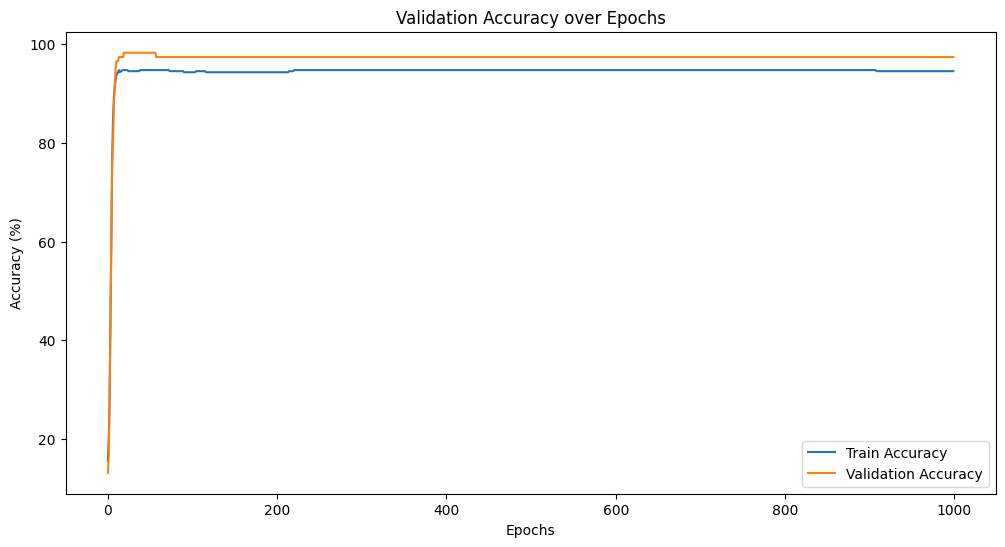

In [ ]:
#TODO: plot training logss
plt.figure(figsize=(12, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
#TODO: plot validation accuracy over iterations
plt.figure(figsize=(12, 6))
plt.plot(history['train_accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()

**Why does the validation accuracy show a slight decrease?**

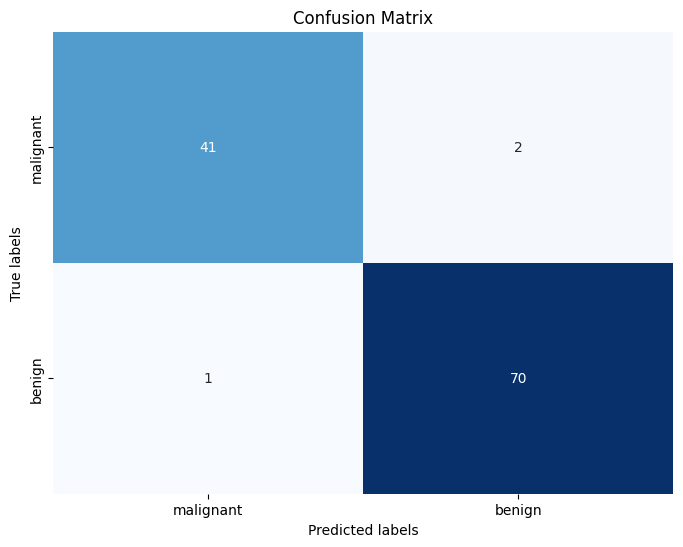

In [ ]:
#TODO: plot confusion matrix
labels = target_names
model.plot_confusion_matrix(X_pca_test,y_test, labels)

### Towards real non-numerical datasets (15 points)

Up to this point, you have successfully implemented Logistic Regression from scratch and applied it to a numerical dataset (the Breast Cancer dataset, where all features were numerical).

Now, let’s take it a step further by applying your classifier to a non-numerical dataset. We will use the [Rotten Tomatoes Reviews dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset), a popular dataset for sentiment analysis. This dataset contains movie reviews categorized into two classes: 'rotten' and 'fresh', representing binary sentiment classification.

To work with this dataset, we will first create embedding vectors for the text data. These embeddings will numerically represent each review and allow us to classify them based on their content. The focus will be on building meaningful embeddings that capture the essence of the reviews and using Logistic Regression to perform sentiment classification.

If you're using Google Colab, you can use the following cells to download and unzip the dataset directly. Alternatively, you may choose to download and extract it manually on your device

In [ ]:
import os

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
!unzip rotten-tomatoes-movies-and-critic-reviews-dataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
License(s): CC0-1.0
100% 77.0M/77.2M [00:04<00:00, 22.8MB/s]
100% 77.2M/77.2M [00:04<00:00, 18.0MB/s]
Archive:  rotten-tomatoes-movies-and-critic-reviews-dataset.zip
  inflating: rotten_tomatoes_critic_reviews.csv  
  inflating: rotten_tomatoes_movies.csv  


#### Requierments
Please make sure that NLTK is available before proceeding to the next cells

In [ ]:
!pip install nltk

#### Libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Since the dataset is quite large, we will focus on a subset of the data by selecting only reviews from top critics and movies with non-NaN review scores. Let's load this subset into a DataFrame and display the first couple of rows

In [ ]:
#TODO: import data and filter out required rows
critic_reviews_df = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')
movies_df = pd.read_csv('/content/rotten_tomatoes_movies.csv')
merged_df = pd.merge(critic_reviews_df, movies_df, on='rotten_tomatoes_link', how='inner')
merged_df.sample(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
807900,m/sideways,Phoebe Flowers,False,South Florida Sun-Sentinel,Fresh,4/4,2004-11-11,Sideways is bound to end up the single funnies...,Sideways,Struggling writer and wine enthusiast Miles (P...,...,Fox Searchlight Pictures,Certified-Fresh,97.0,233.0,Upright,79.0,197689.0,50,225,8
765303,m/scary_stories_to_tell_in_the_dark,Ryan Syrek,False,"The Reader (Omaha, NE)",Fresh,B,2019-08-09,It uses modern special effects juju to make St...,Scary Stories to Tell in the Dark,The shadow of the Bellows family has loomed la...,...,CBS Films and Lionsgate,Certified-Fresh,78.0,229.0,NaN,72.0,8242.0,27,178,51
600391,m/my_life_as_a_zucchini,Beth Accomando,False,KPBS.org,Fresh,NaN,2017-03-03,Barras' direction keeps the film from being ne...,My Life as a Zucchini (Ma vie de courgette),A police officer (Nick Offerman) and some new ...,...,Rita Productions,Certified-Fresh,99.0,137.0,Upright,89.0,6560.0,31,135,2
862957,m/st_trinians,Mike Barnard,False,Future Movies UK,Rotten,4/10,2007-12-10,NaN,St. Trinian's,Ungovernable students at a school for free exp...,...,NeoClassics Films,Rotten,31.0,42.0,Spilled,55.0,32225.0,18,13,29
745880,m/rumble_fish,Matt Glasby,False,Film4,Fresh,4/5,2003-05-24,"An iconic outsider of 1980s teen cinema, Rumbl...",Rumble Fish,"Disaffected and restless, Rusty James (Matt Di...",...,Universal Pictures,Fresh,73.0,33.0,Upright,80.0,23469.0,6,24,9


In [ ]:
reviews = merged_df[pd.notna(merged_df['review_score']) & (merged_df['top_critic'] == True)]
reviews.sample(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
524974,m/little_2019,Tomris Laffly,True,Time Out,Fresh,3/5,2019-04-11,While truly inspired laughs are in short suppl...,Little,Jordan is a take-no-prisoners tech mogul who t...,...,Universal Pictures,Rotten,46.0,157.0,Upright,60.0,1419.0,36,73,84
885012,m/stories_we_tell,Sheila O'Malley,True,Chicago Sun-Times,Fresh,4/4,2013-05-23,Stories told again and again have a way of nea...,Stories We Tell,"Through a series of revealing interviews, film...",...,Roadside Attractions,Certified-Fresh,94.0,144.0,Upright,79.0,14782.0,45,136,8
956078,m/the_four_times,Joe Williams,True,St. Louis Post-Dispatch,Fresh,3/4,2011-07-15,The God's-eye view becomes mesmerizing when we...,The Four Times (Le Quattro Volte),An old shepherd drinks church dust to stave of...,...,Lorber Films,Certified-Fresh,93.0,54.0,Upright,75.0,1969.0,21,50,4
393819,m/grosse_pointe_blank,Kenneth Turan,True,Los Angeles Times,Fresh,4.5/5,2001-02-14,Clever enough to make jokes about Greco-Roman ...,Grosse Pointe Blank,After assassin Martin Blank (John Cusack) has ...,...,Buena Vista Internationa,Certified-Fresh,80.0,71.0,Upright,87.0,73034.0,21,57,14
580933,m/mississippi_grind,Katie Walsh,True,Tribune News Service,Fresh,3.5/4,2015-10-07,It's as if the Scarecrow and the Tin Man got l...,Mississippi Grind,Convinced that his newfound friend (Ryan Reyno...,...,A24 and DIRECTV,Certified-Fresh,91.0,118.0,Spilled,55.0,8518.0,33,107,11


To work with the text data, we need to preprocess it. For simplicity, we will perform the following preprocessing steps:
- Convert the text to lowercase
- Remove non-English characters
- Eliminate common English stopwords
- Apply lemmatization using NLTK

Since the dataset is quite large, performing this preprocessing on the CPU may take some time. If you have access to a GPU (either through Google Colab or your local device), we recommend setting the runtime_env to GPU for faster preprocessing. This will significantly speed up the process!

In [ ]:
runtime_env = 'GPU' # or CPU

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

if runtime_env == 'GPU':
  import cudf
  import cupy as cp

  def preprocess_text_gpu(text_series):
      text_series = cudf.Series(text_series)
      text_series = text_series.str.lower()
      text_series = text_series.str.replace(r'[^a-z\s]', '', regex=True)
      text_series = text_series.to_pandas()

      processed_texts = []
      for text in text_series:
          tokens = word_tokenize(text)
          tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
          processed_texts.append(' '.join(tokens))
      return processed_texts

  reviews['processed_content'] = preprocess_text_gpu(reviews['review_content'].astype(str))

elif runtime_env == 'CPU':
  def preprocess_text(text):
      text = text.lower()
      text = re.sub(r'[^a-z\s]', '', text)
      tokens = word_tokenize(text)
      tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
      return ' '.join(tokens)

  reviews['processed_content'] = reviews['review_content'].astype(str).apply(preprocess_text)

print(reviews[['review_type', 'review_content', 'processed_content']].head())

   review_type                                     review_content  \
7        Fresh  Percy Jackson isn't a great movie, but it's a ...   
9        Fresh  Crammed with dragons, set-destroying fights an...   
11      Rotten  For what it is and for whom it is intended, it...   
12      Rotten  Chris Columbus returns to his comfort zone for...   
21      Rotten  Although the standard allegorical bases for my...   

                                    processed_content  
7   percy jackson isnt great movie good one trotti...  
9   crammed dragon setdestroying fight thing explo...  
11                 intended bad movie indifferent one  
12  chris columbus return comfort zone mirthless e...  
21  although standard allegorical base mythicalque...  


<ipython-input-10-311c4e66bd8d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['processed_content'] = preprocess_text_gpu(reviews['review_content'].astype(str))


Next, let’s visualize the distribution of the classes in the dataset.

This will help us determine whether the data is balanced between the two classes ('rotten' and 'fresh') or if there is an imbalance that might affect our model's performance.

<ipython-input-11-ae9df3bca5e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_type', data=reviews, palette='Set2')


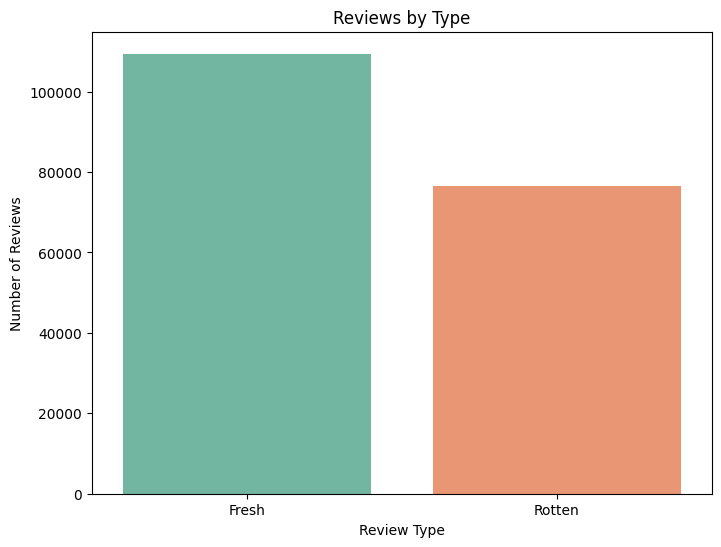

In [ ]:
#TODO: inspect classes 'Rotten' and 'Fresh'
plt.figure(figsize=(8, 6))
sns.countplot(x='review_type', data=reviews, palette='Set2')
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.title('Reviews by Type')
plt.show()

In sentiment analysis, we often face the challenge of working with non-numerical data, such as text. To address this, we use [embeddings](https://www.geeksforgeeks.org/what-are-embeddings-in-machine-learning/). An embedding is a method for converting non-numerical data (like words or sentences) into numerical vectors, which can be processed by machine learning algorithms.

Embeddings can be fixed-size or variable-length, and there are many techniques to create them. Some embeddings, like GloVe and Word2Vec, are based on the context of words in a corpus. These methods capture semantic meaning by considering how words relate to each other in context. Alternatively, simpler embeddings, such as Bag-of-Words (BoW), are based on word frequencies within the text.

In this case, we will implement a simple approach. Instead of using pre-trained embeddings, we will create our own using word frequencies within the two classes: Fresh and Rotten.

Here’s the process:

1. Term Frequency (TF): We calculate the frequency of each word in the Fresh and Rotten reviews.
2. Document Frequency (DF): For each word, we calculate the number of reviews (documents) in which it appears.
3. TF-IDF Representation: Each review will be represented as a vector of two numbers:
  - The first number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Rotten class.
  - The second number is the sum of the term frequencies of the words in the review, weighted by the inverse of their document frequency, for the Fresh class.
4. Normalization: To ensure consistent scale and improve the performance of our model, we normalize the resulting vector.

This embedding is widely known as [TF-IDF](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/). It helps represent text by emphasizing words that are important to a specific document while reducing the influence of commonly occurring words across the dataset

In [ ]:
#TODO: generate required tf/idf values
fresh_reviews = reviews[reviews['review_type'] == 'Fresh']
rotten_reviews = reviews[reviews['review_type'] == 'Rotten']

tf_fresh = defaultdict(int)
tf_rotten = defaultdict(int)

for content in fresh_reviews['processed_content']:
    for word in content.split():
        tf_fresh[word] += 1

for content in rotten_reviews['processed_content']:
    for word in content.split():
        tf_rotten[word] += 1

df = defaultdict(int)
all_contents = reviews['processed_content'].tolist()

for content in all_contents:
    unique_words = set(content.split())
    for word in unique_words:
        df[word] += 1

N = len(reviews)
idf = {word: np.log(N / (df[word] + 1)) for word in df}

In [ ]:
#TODO: create embedding vector in which first element represents 'Fresh' class score and second element represents 'Rotten' class score for each word
def calculate_embedding(content):
    words = content.split()
    fresh_score = sum(tf_fresh[word] * idf.get(word, 0) for word in words)
    rotten_score = sum(tf_rotten[word] * idf.get(word, 0) for word in words)
    return [fresh_score, rotten_score]
def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    return vector / norm if norm != 0 else vector

reviews['embedding_vector'] = reviews['processed_content'].apply(calculate_embedding)
reviews['embedding_vector'] = reviews['embedding_vector'].apply(normalize_vector)
reviews[['review_type', 'processed_content', 'embedding_vector']].head()

<ipython-input-64-51a80d9ed492>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['embedding_vector'] = reviews['processed_content'].apply(calculate_embedding)
<ipython-input-64-51a80d9ed492>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['embedding_vector'] = reviews['embedding_vector'].apply(normalize_vector)


,review_type,processed_content,embedding_vector
7,Fresh,percy jackson isnt great movie good one trotti...,"[0.7915540529432508, 0.6110991582952094]"
9,Fresh,crammed dragon setdestroying fight thing explo...,"[0.8482367103984031, 0.5296172987474026]"
11,Rotten,intended bad movie indifferent one,"[0.7541060164379044, 0.6567527053405681]"
12,Rotten,chris columbus return comfort zone mirthless e...,"[0.7686213097387876, 0.6397040583077701]"
21,Rotten,although standard allegorical base mythicalque...,"[0.7722632230647848, 0.6353026950215073]"


Next, we will use the Logistic Regression class that we implemented in previous sections to classify the reviews based on the embeddings we created.

In [ ]:
#TODO: split dataset and train you model
X = np.array(reviews['embedding_vector'].tolist())
y = reviews['review_type']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
model = LogisticRegressionGD(learning_rate=0.5, n_steps=5000, tolerance=1e-6)
history = model.fit(X_train, y_train, X_val, y_val)

Epoch 0/5000: Training Loss = 0.8278, Training Accuracy = 58.89%, Validation Loss = 0.8330, Validation Accuracy = 58.54%
Epoch 100/5000: Training Loss = 0.6762, Training Accuracy = 58.89%, Validation Loss = 0.6774, Validation Accuracy = 58.54%
Epoch 200/5000: Training Loss = 0.6525, Training Accuracy = 59.71%, Validation Loss = 0.6535, Validation Accuracy = 59.38%
Epoch 300/5000: Training Loss = 0.6355, Training Accuracy = 61.60%, Validation Loss = 0.6365, Validation Accuracy = 61.33%
Epoch 400/5000: Training Loss = 0.6232, Training Accuracy = 63.99%, Validation Loss = 0.6241, Validation Accuracy = 63.86%
Epoch 500/5000: Training Loss = 0.6141, Training Accuracy = 65.80%, Validation Loss = 0.6150, Validation Accuracy = 65.70%
Epoch 600/5000: Training Loss = 0.6073, Training Accuracy = 66.92%, Validation Loss = 0.6082, Validation Accuracy = 66.85%
Epoch 700/5000: Training Loss = 0.6021, Training Accuracy = 67.66%, Validation Loss = 0.6029, Validation Accuracy = 67.63%
Epoch 800/5000: Tr


Classification Report:
              precision    recall  f1-score   support

       Fresh       0.71      0.82      0.76     16331
      Rotten       0.67      0.52      0.58     11569

    accuracy                           0.69     27900
   macro avg       0.69      0.67      0.67     27900
weighted avg       0.69      0.69      0.69     27900



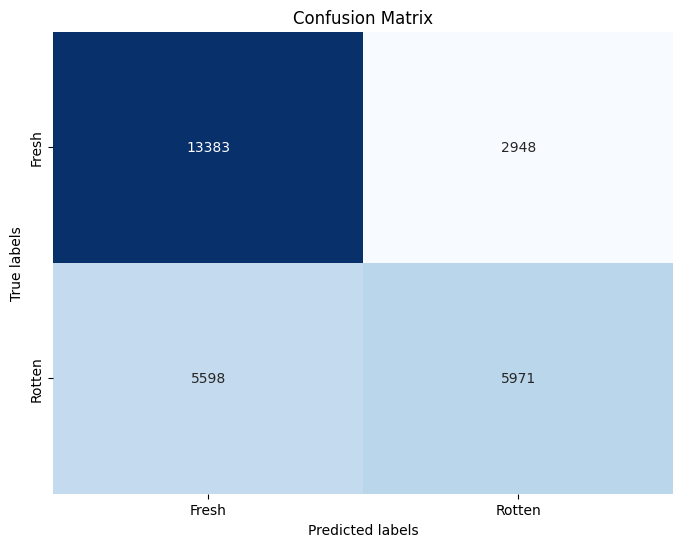

In [ ]:
#TODO: inspect the performance of model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))
labels = label_encoder.classes_
model.plot_confusion_matrix(X_val, y_val, labels)

## Decision Tree (50 points)

In this section, you will implement a **Decision Tree (DT)** from scratch. We will use the [Bank Marketing Dataset from the UCI Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains a mix of **numerical** and **non-numerical** features.


### Libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


First, let's load the dataset and inspect it:

In [21]:
#TODO: import dataset and inspect it
df = pd.read_csv('/content/bank.csv', delimiter=';')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2435,40,management,married,tertiary,no,1548,yes,no,cellular,13,apr,101,3,-1,0,unknown,no
3747,37,blue-collar,married,secondary,no,140,yes,yes,cellular,7,may,490,1,-1,0,unknown,no
2204,49,services,married,secondary,no,47,no,no,unknown,5,may,234,2,-1,0,unknown,no
512,52,technician,married,secondary,no,195,yes,no,cellular,18,feb,220,1,63,5,failure,yes
2321,27,services,single,secondary,no,54,yes,no,unknown,28,may,543,2,-1,0,unknown,yes


### Implementation (20 points)

You will implement a class for a **Decision Tree** that includes:
1. **Entropy (H)** calculation.
2. **Information Gain (IG)** computation.
3. A method to split the dataset based on the best feature and decision thresholds.

**Entropy (H):** Entropy is a measure of the impurity or uncertainty of a dataset. It is given by:

$$ H(S) = - \sum_{i=1}^c p_i \log_2(p_i) $$

Where:
- $S$ is the dataset.
- $p_i$ is the proportion of samples in class $i$.
- $c$ is the total number of classes.

**Information Gain (IG):** Information Gain quantifies the reduction in entropy when a dataset is split on a particular feature. It is calculated as:

$$IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $S$ is the dataset.
- $A$ is the feature used for the split.
- $\text{Values}(A)$ are the unique values of feature \(A\).
- $S_v$ is the subset of \(S\) where $A = v$.

The decision tree selects the feature and split point that maximizes the **Information Gain** at each node. The process is repeated recursively until:
1. The node becomes pure (contains only one class).
2. A stopping criterion like **maximum depth** is reached.


In [42]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=8):
        self.tree = None
        self.max_depth = max_depth

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def information_gain(self, X, y, feature_index):
        """Calculate the information gain for a feature."""
        original_entropy = self.entropy(y)
        feature_values = np.unique(X[:, feature_index])
        weighted_entropy = 0
        for value in feature_values:
            mask = X[:, feature_index] == value
            subset_labels = y[mask]
            weighted_entropy += (len(subset_labels) / len(y)) * self.entropy(subset_labels)

        return original_entropy - weighted_entropy

    def best_feature_to_split(self, X, y):
        """Find the best feature to split the dataset."""
        best_gain = -1
        best_feature = None
        for feature_index in range(X.shape[1]):
            gain = self.information_gain(X, y, feature_index)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index

        return best_feature

    def fit(self, X, y, depth=0):
        """Fit the decision tree to the training data."""
        if len(np.unique(y)) == 1:
            return y[0]
        if depth >= self.max_depth:
            return np.bincount(y).argmax()

        best_feature = self.best_feature_to_split(X, y)
        if best_feature is None:
            return np.bincount(y).argmax()

        tree = {'feature': best_feature, 'branches': {}}
        feature_values = np.unique(X[:, best_feature])

        for value in feature_values:
            mask = X[:, best_feature] == value
            subtree = self.fit(X[mask], y[mask], depth + 1)
            tree['branches'][value] = subtree

        self.tree = tree
        return self.tree

    def predict_sample(self, sample, tree):
        """Predict the label for a single sample."""
        if isinstance(tree, dict):
            feature_value = sample[tree['feature']]
            subtree = tree['branches'].get(feature_value, None)
            if subtree is None:
                return None  # Handle unknown feature values
            return self.predict_sample(sample, subtree)
        return tree

    def predict(self, X):
        """Predict the labels for a dataset."""
        predictions = []
        for sample in X:
            prediction = self.predict_sample(sample, self.tree)
            if prediction is None:
                prediction = -1  # Assign default label for unknown values
            predictions.append(prediction)
        return predictions

### Testing (5 points)

Initially, we will treat **all features uniformly**, regardless of whether they are numerical or categorical. For example:
- The `month` column (categorical) and the `balance` column (continuous numerical) will both be handled the same way.

Now let's test the accuracy of model on dataset

In [43]:
label_encoder = LabelEncoder()
#TODO: encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
#TODO: split dataset into features (X) and labels (y)
X = df.drop('y', axis=1)
y = df['y']
#TODO: split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#TODO: train your model
tree = DecisionTree(max_depth=8)
tree.fit(X_train.values, y_train.values)
#TODO: make predictions on the test set
y_pred = tree.predict(X_test.values)
#TODO: evaluate the predictions
accuracy = sum(y_pred == y_test.values)/len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.33%


**Could you explain why is the Accuracy Poor?**

The accuracy of this Decision Tree is poor because it treats all features as categorical, which discards valuable information in continuous or ordinal data. By splitting only on exact feature values, the model may overfit the training data and fail to generalize to unseen data, especially when feature values are numerous or sparse.

### Improved DT implementation (20 points)

In the previous implementation, all features—both numerical and categorical—were treated in the same way.

#### The Problem with Numerical Features:
Numerical features, like `balance` or `age`, require splitting data into intervals (e.g., "Is `balance > 500`?") rather than treating each unique value as a separate category. By failing to implement **threshold-based splits**, the tree:
- Cannot capture meaningful patterns in continuous data.
- Produces suboptimal splits, reducing accuracy and generalization.

To handle numerical features effectively, we need to:
1. Identify potential thresholds for splitting.
2. Calculate the **information gain** for each threshold.
3. Choose the threshold with the highest information gain.

#### Decision Rule for Numerical Features:
For a numerical feature \( f \), the dataset is split into two subsets:
- **Left subset**: $ X[f] \leq \text{threshold} $
- **Right subset**: $ X[f] > \text{threshold} $

The split maximizes the **Information Gain (IG)**:

$$
IG = H(parent) - \left( \frac{|left|}{|parent|} \cdot H(left) + \frac{|right|}{|parent|} \cdot H(right) \right)
$$

Where:
- $ H $ is the entropy.

**Try implementing the updated class and test it on the dataset again!**


In [44]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        """
        Initialize the DecisionTree class.
        Args:
            max_depth (int, optional): Maximum depth of the tree. If None, the tree grows fully.
        """
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        """Calculate the entropy of a dataset."""
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def information_gain(self, X, y, feature_index, threshold):
        """
        Calculate the information gain for a numerical feature at a given threshold.
        """
        original_entropy = self.entropy(y)
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        left_labels = y[left_mask]
        right_labels = y[right_mask]

        weighted_entropy = 0
        if len(left_labels) > 0:
            weighted_entropy += (len(left_labels) / len(y)) * self.entropy(left_labels)
        if len(right_labels) > 0:
            weighted_entropy += (len(right_labels) / len(y)) * self.entropy(right_labels)

        return original_entropy - weighted_entropy

    def find_best_threshold(self, feature_column, y):
        """
        Find the best threshold to split a numerical feature.
        Returns the best threshold and corresponding information gain.
        """
        unique_values = np.unique(feature_column)
        best_gain = -1
        best_threshold = None

        for threshold in unique_values:
            gain = self.information_gain(feature_column[:, np.newaxis], y, 0, threshold)
            if gain > best_gain:
                best_gain = gain
                best_threshold = threshold

        return best_threshold, best_gain

    def best_feature_to_split(self, X, y):
        """
        Determine the best feature and threshold to split the dataset.
        Returns the index of the best feature and the optimal threshold.
        """
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature_index in range(X.shape[1]):
            threshold, gain = self.find_best_threshold(X[:, feature_index], y)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold

        return best_feature, best_threshold

    def fit(self, X, y, depth=0):
        """
        Fit the decision tree to the training data.
        Args:
            X: 2D numpy array of feature values.
            y: 1D numpy array of target values.
            depth (int): Current depth of the tree (default: 0).
        Returns:
            A dictionary representing the decision tree.
        """
        if len(np.unique(y)) == 1:
            return y[0]
        if self.max_depth is not None and depth >= self.max_depth:
            return np.bincount(y).argmax()

        best_feature, best_threshold = self.best_feature_to_split(X, y)
        if best_feature is None:
            return np.bincount(y).argmax()

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_subtree = self.fit(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.fit(X[right_mask], y[right_mask], depth + 1)

        self.tree = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }
        return self.tree

    def predict_sample(self, sample, tree):
        """
        Predict the label for a single sample by traversing the tree.
        Args:
            sample: A 1D numpy array of feature values.
            tree: The decision tree (dictionary).
        Returns:
            int or str: Predicted label for the sample.
        """
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['threshold']:
                return self.predict_sample(sample, tree['left'])
            else:
                return self.predict_sample(sample, tree['right'])
        return tree

    def predict(self, X):
        """
        Predict the labels for a dataset by traversing the tree for each sample.
        Args:
            X: 2D numpy array of feature values.
        Returns:
            List[int or str]: Predicted labels for the dataset.
        """
        return [self.predict_sample(sample, self.tree) for sample in X]

### Testing (5 points)

In [45]:
label_encoder = LabelEncoder()
#TODO: encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
#TODO: split dataset into features (X) and labels (y)
X = df.drop('y', axis=1)
y = df['y']
#TODO: split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#TODO: train your model
tree = ImprovedDecisionTree(max_depth=8)
tree.fit(X_train.values, y_train.values)
#TODO: make predictions on the test set
y_pred = tree.predict(X_test.values)
#TODO: evaluate the predictions
accuracy = sum(y_pred == y_test.values)/len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.73%


**Why did the accuracy improve? What role do numerical features like `balance` and `age` play in the prediction task? Why does treating them properly—using threshold-based splits—make such a difference in the model's performance?**

The accuracy improved because threshold-based splits preserve the inherent ordering and distribution of numerical features like balance and age, allowing the model to create more meaningful splits. These features often have a strong, continuous relationship with the target variable, and treating them as categorical would lose this information, leading to suboptimal splits. By using thresholds, the decision tree can better segment the data into regions with distinct target distributions, resulting in a model that generalizes more effectively to unseen data.